<a href="https://colab.research.google.com/github/oluwamark/compx310/blob/main/Lab10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://colab.research.google.com/drive/1WXJrrLOuNwyVBVWXSCiMlwmkL9f2jJpQ?usp=sharing

**I unfortunately forgot to specify random_state=id for random forest and the neural network. I don't have the time or computing units to retrain this model**

###Preprocessing

In [ ]:
import pandas as pd

id = 1631625
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data.csv')
data.head()

,a0,a1,a2,a3,a4,a5,a6,a7,a8,a9,...,a2040,a2041,a2042,a2043,a2044,a2045,a2046,a2047,file,target
0,0.987159,-0.629449,-0.006023,-0.347239,1.676458,-0.322336,0.295421,0.599619,-0.401561,-0.764479,...,-0.936275,-1.105490,-0.688952,-0.606492,-0.351768,-0.495843,-0.923672,-0.439941,14986.jpg,0
1,-0.621512,-0.486168,-0.627894,-0.899259,-0.489736,-0.180663,-0.585231,-0.219178,-0.273466,-0.063870,...,-0.402456,-1.000294,-0.401711,0.065169,-0.612849,1.329306,-0.189771,0.209548,3138.jpg,0
2,-0.461637,-0.586819,-0.058349,0.412567,0.024197,1.308825,0.187696,-1.148081,0.485641,0.057516,...,1.404732,-0.253244,-0.252336,-0.163078,-0.785985,4.627949,-0.609841,-0.831458,1700.jpg,0
3,2.017703,-0.434376,-0.612436,0.670076,-0.762519,-0.692070,0.700587,-0.130921,-0.418634,0.306285,...,-0.946080,-0.624846,0.495533,-0.525775,-0.308397,1.141025,1.933065,-0.388813,16257.jpg,0
4,2.285501,-0.960575,0.400247,1.382798,-1.239082,0.598040,0.445940,0.310546,-0.556349,0.065078,...,0.785869,0.099995,2.000137,-0.687619,0.121015,2.718197,1.353535,0.821876,2863.jpg,0


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

X = data.drop(['file','target'], axis=1)
y = data['target']

# scale data
scaler = preprocessing.StandardScaler()
Xscaled = scaler.fit_transform(X)
Xscaled = pd.DataFrame(Xscaled)

# use 80/20 train/test split
Xtrain, Xtest, ytrain, ytest = train_test_split(Xscaled,y,test_size=0.2, random_state=id, stratify=y)

###Logistic Regression

In [ ]:
# https://www.geeksforgeeks.org/machine-learning/how-to-optimize-logistic-regression-performance/

from sklearn import linear_model
from sklearn.model_selection import GridSearchCV
import numpy as np

# define parameter grid for grid search
param_grid = [
    {
    'max_iter'  : [100,1000,2500,5000],
    'C' : [0.0001,0.01,0.1,0.2],
  }
]

log_model = linear_model.LogisticRegression(max_iter=2000,random_state=id,solver='lbfgs')

clf = GridSearchCV(log_model,param_grid=param_grid, cv=10,verbose=3)

In [ ]:
logr_optimal = clf.fit(Xtrain,ytrain)
print("Best Parameters:", logr_optimal.best_params_)
print("Best Estimator:", logr_optimal.best_estimator_)
print("Best Estimator's Score:", logr_optimal.best_score_)

Fitting 10 folds for each of 16 candidates, totalling 160 fits
[CV 1/10] END ...........C=0.0001, max_iter=100;, score=0.947 total time=   8.1s
[CV 2/10] END ...........C=0.0001, max_iter=100;, score=0.940 total time=   8.1s
[CV 3/10] END ...........C=0.0001, max_iter=100;, score=0.933 total time=   8.2s
[CV 4/10] END ...........C=0.0001, max_iter=100;, score=0.955 total time=   8.6s
[CV 5/10] END ...........C=0.0001, max_iter=100;, score=0.931 total time=   7.5s
[CV 6/10] END ...........C=0.0001, max_iter=100;, score=0.930 total time=   9.4s
[CV 7/10] END ...........C=0.0001, max_iter=100;, score=0.933 total time=   8.2s
[CV 8/10] END ...........C=0.0001, max_iter=100;, score=0.932 total time=   7.8s
[CV 9/10] END ...........C=0.0001, max_iter=100;, score=0.932 total time=   8.7s
[CV 10/10] END ..........C=0.0001, max_iter=100;, score=0.930 total time=   7.8s
[CV 1/10] END ..........C=0.0001, max_iter=1000;, score=0.947 total time=   8.0s
[CV 2/10] END ..........C=0.0001, max_iter=100

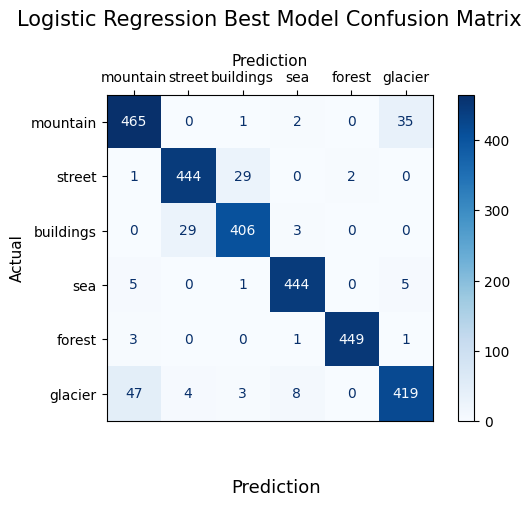

In [ ]:
# https://www.geeksforgeeks.org/python/matplotlib-setting-ticks-and-tick-labels/

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt

# get predictions
logr_pred = logr_optimal.predict(Xtest)

# create confusion matrix
cm = confusion_matrix(ytest,logr_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Logistic Regression Best Model Confusion Matrix', fontsize=15, pad=20)
plt.xlabel('Prediction', fontsize=11)
plt.ylabel('Actual', fontsize=11)
plt.gca().xaxis.set_label_position('top')
plt.gca().xaxis.tick_top()
plt.gca().figure.subplots_adjust(bottom=0.2)
plt.gca().figure.text(0.5, 0.05, 'Prediction', ha='center', fontsize=13)
plt.xticks([0, 1, 2, 3, 4, 5], ['mountain', 'street', 'buildings', 'sea', 'forest', 'glacier'])
plt.yticks([0, 1, 2, 3, 4, 5], ['mountain', 'street', 'buildings', 'sea', 'forest', 'glacier'])
plt.show()

In [ ]:
class_report = classification_report(ytest, logr_pred, target_names=['mountain', 'street', 'buildings', 'sea', 'forest', 'glacier'])
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

    mountain       0.89      0.92      0.91       503
      street       0.93      0.93      0.93       476
   buildings       0.92      0.93      0.92       438
         sea       0.97      0.98      0.97       455
      forest       1.00      0.99      0.99       454
     glacier       0.91      0.87      0.89       481

    accuracy                           0.94      2807
   macro avg       0.94      0.94      0.94      2807
weighted avg       0.94      0.94      0.94      2807



###K-Nearest Neighbours

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
# this link https://stats.stackexchange.com/questions/534999/why-is-k-sqrtn-a-good-solution-of-the-number-of-neighbors-to-consider
# suggests k = sqrt(n) is a good starting point for selecting number of neighbours considered
# so will considers k in this range or thereabouts. sqrt(14000) = 118 (approx)
knn_params = [{'n_neighbors': [15, 25, 50, 75, 100, 125],
              'weights':['uniform','distance']
               }]

# define parameter grid for grid search
knn_model = KNeighborsClassifier()

# grid search to find optimal (highest accuracy) model
knn_grid = GridSearchCV(knn_model,param_grid=knn_params, cv=10,verbose=3)


In [ ]:
knn_optimal = knn_grid.fit(Xtrain,ytrain)

print("Best Parameters:", knn_optimal.best_params_)
print("Best Estimator:", knn_optimal.best_estimator_)
print("Best Estimator Score:", knn_optimal.best_score_)

Fitting 10 folds for each of 12 candidates, totalling 120 fits
[CV 1/10] END ..n_neighbors=15, weights=uniform;, score=0.922 total time=   1.5s
[CV 2/10] END ..n_neighbors=15, weights=uniform;, score=0.928 total time=   1.5s
[CV 3/10] END ..n_neighbors=15, weights=uniform;, score=0.917 total time=   1.5s
[CV 4/10] END ..n_neighbors=15, weights=uniform;, score=0.941 total time=   2.3s
[CV 5/10] END ..n_neighbors=15, weights=uniform;, score=0.923 total time=   1.9s
[CV 6/10] END ..n_neighbors=15, weights=uniform;, score=0.926 total time=   1.5s
[CV 7/10] END ..n_neighbors=15, weights=uniform;, score=0.925 total time=   1.5s
[CV 8/10] END ..n_neighbors=15, weights=uniform;, score=0.918 total time=   1.5s
[CV 9/10] END ..n_neighbors=15, weights=uniform;, score=0.922 total time=   1.5s
[CV 10/10] END .n_neighbors=15, weights=uniform;, score=0.914 total time=   1.5s
[CV 1/10] END .n_neighbors=15, weights=distance;, score=0.923 total time=   1.6s
[CV 2/10] END .n_neighbors=15, weights=distanc

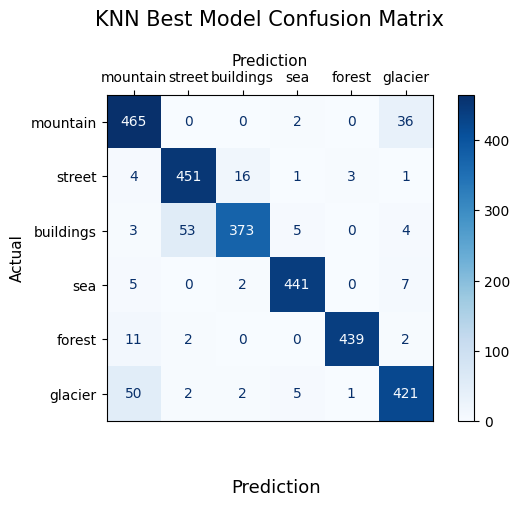

Classification Report:
              precision    recall  f1-score   support

    mountain       0.86      0.92      0.89       503
      street       0.89      0.95      0.92       476
   buildings       0.95      0.85      0.90       438
         sea       0.97      0.97      0.97       455
      forest       0.99      0.97      0.98       454
     glacier       0.89      0.88      0.88       481

    accuracy                           0.92      2807
   macro avg       0.93      0.92      0.92      2807
weighted avg       0.92      0.92      0.92      2807



In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt
# get predictions
knn_pred = knn_optimal.predict(Xtest)

# create confusion matrix
cm = confusion_matrix(ytest,knn_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('KNN Best Model Confusion Matrix', fontsize=15, pad=20)
plt.xlabel('Prediction', fontsize=11)
plt.ylabel('Actual', fontsize=11)
plt.gca().xaxis.set_label_position('top')
plt.gca().xaxis.tick_top()
plt.gca().figure.subplots_adjust(bottom=0.2)
plt.gca().figure.text(0.5, 0.05, 'Prediction', ha='center', fontsize=13)
plt.xticks([0, 1, 2, 3, 4, 5], ['mountain', 'street', 'buildings', 'sea', 'forest', 'glacier'])
plt.yticks([0, 1, 2, 3, 4, 5], ['mountain', 'street', 'buildings', 'sea', 'forest', 'glacier'])
plt.show()

class_report = classification_report(ytest, knn_pred, target_names=['mountain', 'street', 'buildings', 'sea', 'forest', 'glacier'])
print("Classification Report:")
print(class_report)

###Random Forest

In [ ]:
# https://www.geeksforgeeks.org/machine-learning/random-forest-hyperparameter-tuning-in-python/

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import numpy as np

param_grid = {
    'n_estimators': [25, 50],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
}

randForest = RandomForestClassifier(bootstrap=True)
grid_search = GridSearchCV(randForest, param_grid=param_grid, cv=10, verbose=2)
grid_search.fit(Xtrain, ytrain)

print("Best Parameters:", grid_search.best_params_)
print("Best Estimator:", grid_search.best_estimator_)

Fitting 10 folds for each of 16 candidates, totalling 160 fits
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=25; total time=  12.7s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=25; total time=  12.4s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=25; total time=  12.4s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=25; total time=  12.6s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=25; total time=  13.3s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=25; total time=  12.5s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=25; total time=  12.7s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=25; total time=  12.7s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=25; total time=  12.7s
[CV] END max_depth=10, min_samples_le

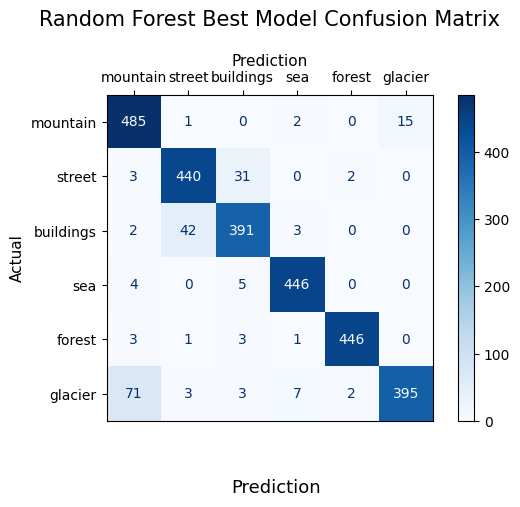

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt

# rename optimal random forest classifier
randForest_optimal = grid_search
# get predictions
randForest_pred = randForest_optimal.predict(Xtest)

# create confusion matrix
cm = confusion_matrix(ytest,randForest_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Random Forest Best Model Confusion Matrix', fontsize=15, pad=20)
plt.xlabel('Prediction', fontsize=11)
plt.ylabel('Actual', fontsize=11)
plt.gca().xaxis.set_label_position('top')
plt.gca().xaxis.tick_top()
plt.gca().figure.subplots_adjust(bottom=0.2)
plt.gca().figure.text(0.5, 0.05, 'Prediction', ha='center', fontsize=13)
plt.xticks([0, 1, 2, 3, 4, 5], ['mountain', 'street', 'buildings', 'sea', 'forest', 'glacier'])
plt.yticks([0, 1, 2, 3, 4, 5], ['mountain', 'street', 'buildings', 'sea', 'forest', 'glacier'])
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import numpy as np

# rename optimal random forest classifier, use params found during gridsearch
randForest_optimal = RandomForestClassifier(max_depth=10,min_samples_leaf=1,min_samples_split=2,n_estimators=50, random_state=id)
# get predictions
randForest_optimal.fit(Xtrain,ytrain)
randForest_pred = randForest_optimal.predict(Xtest)

In [ ]:
from sklearn.metrics import accuracy_score
class_report = classification_report(ytest, randForest_pred, target_names=['mountain', 'street', 'buildings', 'sea', 'forest', 'glacier'])
print("RandomForestClassifier Classification Report:")
print(class_report)

RandomForestClassifier Classification Report:
              precision    recall  f1-score   support

    mountain       0.84      0.94      0.89       503
      street       0.92      0.93      0.92       476
   buildings       0.91      0.91      0.91       438
         sea       0.97      0.98      0.97       455
      forest       0.98      0.97      0.98       454
     glacier       0.94      0.81      0.87       481

    accuracy                           0.92      2807
   macro avg       0.93      0.92      0.92      2807
weighted avg       0.93      0.92      0.92      2807



###XGBoost

In [ ]:
# https://xgboost.readthedocs.io/en/stable/parameter.html

import xgboost as xgb
from sklearn.model_selection import GridSearchCV
import numpy as np

param_grid = {
    'n_estimators': [25, 50],
    'max_depth': [5, 8, 12],
    'gamma': [0,0.5]
}

xgb_clf = xgb.XGBClassifier(device='cuda', seed=id)

xgb_optimal = GridSearchCV(xgb_clf, param_grid=param_grid, cv=10, verbose=3)
xgb_optimal.fit(Xtrain, ytrain)

print("Best Parameters:", xgb_optimal.best_params_)
print("Best Estimator:", xgb_optimal.best_estimator_)

Fitting 10 folds for each of 12 candidates, totalling 120 fits


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:729: UserWarning: [15:38:59] WARNING: /workspace/src/common/error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  return func(**kwargs)


[CV 1/10] END gamma=0, max_depth=5, n_estimators=25;, score=0.931 total time=   2.4s
[CV 2/10] END gamma=0, max_depth=5, n_estimators=25;, score=0.928 total time=   2.0s
[CV 3/10] END gamma=0, max_depth=5, n_estimators=25;, score=0.925 total time=   1.8s
[CV 4/10] END gamma=0, max_depth=5, n_estimators=25;, score=0.953 total time=   1.8s
[CV 5/10] END gamma=0, max_depth=5, n_estimators=25;, score=0.924 total time=   1.8s
[CV 6/10] END gamma=0, max_depth=5, n_estimators=25;, score=0.917 total time=   1.8s
[CV 7/10] END gamma=0, max_depth=5, n_estimators=25;, score=0.920 total time=   1.8s
[CV 8/10] END gamma=0, max_depth=5, n_estimators=25;, score=0.930 total time=   2.2s
[CV 9/10] END gamma=0, max_depth=5, n_estimators=25;, score=0.919 total time=   2.0s
[CV 10/10] END gamma=0, max_depth=5, n_estimators=25;, score=0.928 total time=   1.9s
[CV 1/10] END gamma=0, max_depth=5, n_estimators=50;, score=0.937 total time=   2.5s
[CV 2/10] END gamma=0, max_depth=5, n_estimators=50;, score=0.93

In [ ]:
xgb_optimal.best_score_

np.float64(0.9332850002301576)

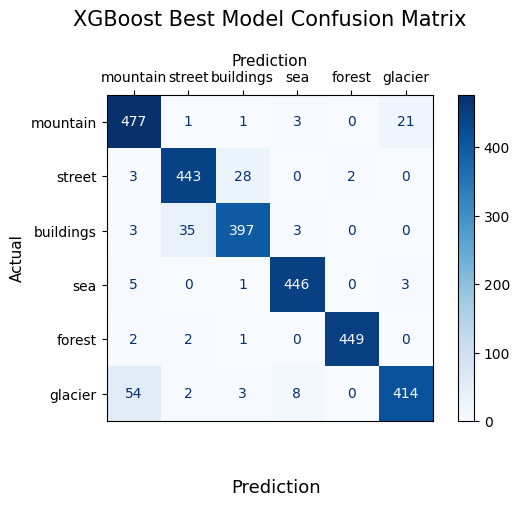

XGBoost Classification Report:
              precision    recall  f1-score   support

    mountain       0.88      0.95      0.91       503
      street       0.92      0.93      0.92       476
   buildings       0.92      0.91      0.91       438
         sea       0.97      0.98      0.97       455
      forest       1.00      0.99      0.99       454
     glacier       0.95      0.86      0.90       481

    accuracy                           0.94      2807
   macro avg       0.94      0.94      0.94      2807
weighted avg       0.94      0.94      0.94      2807



In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt

# get predictions
xgb_pred = xgb_optimal.predict(Xtest)

# create confusion matrix
cm = confusion_matrix(ytest,xgb_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('XGBoost Best Model Confusion Matrix', fontsize=15, pad=20)
plt.xlabel('Prediction', fontsize=11)
plt.ylabel('Actual', fontsize=11)
plt.gca().xaxis.set_label_position('top')
plt.gca().xaxis.tick_top()
plt.gca().figure.subplots_adjust(bottom=0.2)
plt.gca().figure.text(0.5, 0.05, 'Prediction', ha='center', fontsize=13)
plt.xticks([0, 1, 2, 3, 4, 5], ['mountain', 'street', 'buildings', 'sea', 'forest', 'glacier'])
plt.yticks([0, 1, 2, 3, 4, 5], ['mountain', 'street', 'buildings', 'sea', 'forest', 'glacier'])
plt.show()

class_report = classification_report(ytest, xgb_pred, target_names=['mountain', 'street', 'buildings', 'sea', 'forest', 'glacier'])
print("XGBoost Classification Report:")
print(class_report)

###Neural Network

In [ ]:
!pip3 install scikeras
!pip install --upgrade scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 82.9 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.1
    Uninstalling scikit-learn-1.6.1:
      Successfully uninstalled scikit-learn-1.6.1


In [ ]:
# https://kitchell.github.io/DeepLearningTutorial/3mlpsinkeras.html
# https://machinelearningmastery.com/grid-search-hyperparameters-deep-learning-models-python-keras/
# https://www.datacamp.com/tutorial/one-hot-encoding-python-tutorial
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
import numpy as np

# reshape ytrain
ytrain_encoded = pd.get_dummies(ytrain, dtype=int)

# helper function to create NN, allows application of sklearn's keras wrapper
def create_model():
  # define hidden layers, we have 2048 features, so input_dim=2048
  model = Sequential()
  model.add(keras.Input(shape=(2048,)))
  model.add(Dense(64, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(64, activation='relu'))
  model.add(Dropout(0.5))
  # define output layer, have 6 classes
  model.add(Dense(6, activation='softmax'))

  # compile the model
  model.compile(loss='categorical_crossentropy',
            optimizer='ADAM',
            metrics=['accuracy'])
  return model

# create model
NN = KerasClassifier(model=create_model, verbose=1)

# try to tune batch size, number of epochs, and learning rate
learning_rate = [0.001, 0.1]
batch_size = [32,64]
epochs = [10,20]
param_grid = dict(batch_size=batch_size,epochs=epochs,optimizer__learning_rate=learning_rate)

#NN.fit(Xtrain,ytrain_encoded)
NN_grid = GridSearchCV(estimator=NN,param_grid=param_grid,cv=10,verbose=3)

In [ ]:
NN_grid_result = NN_grid.fit(Xtrain,ytrain_encoded)

Fitting 10 folds for each of 8 candidates, totalling 80 fits
Epoch 1/10
316/316 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.6665 - loss: 0.9856
Epoch 2/10
316/316 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8883 - loss: 0.3301
Epoch 3/10
316/316 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9168 - loss: 0.2506
Epoch 4/10
316/316 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9366 - loss: 0.1962
Epoch 5/10
316/316 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9301 - loss: 0.1938
Epoch 6/10
316/316 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9455 - loss: 0.1641
Epoch 7/10
316/316 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9452 - loss: 0.1518
Epoch 8/10
316/316 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9515 - loss: 0.1357
Epoch 9/10
316/316 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9521 - loss: 0.1275
Epoch 10/10
316/316 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9598 - loss: 0.1209
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step
[CV 1/10] END batch_size=32, epochs=10

In [ ]:
NN_grid_result.best_score_

np.float64(0.9405000452378799)

In [ ]:
NN_grid_result.best_params_

{'batch_size': 64, 'epochs': 10, 'optimizer__learning_rate': 0.001}

**Need to refit best performing model because runtime ended**

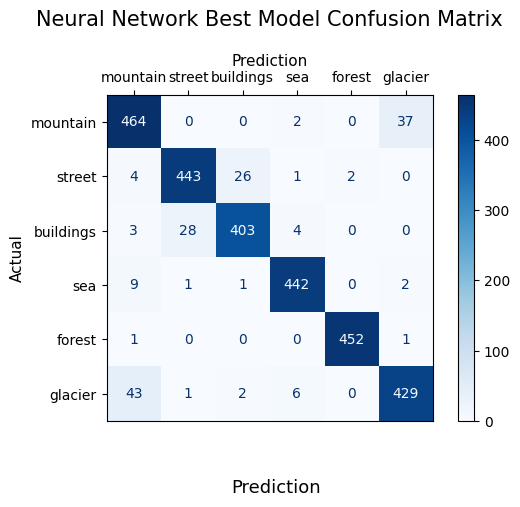

Neural Network Classification Report:
              precision    recall  f1-score   support

    mountain       0.89      0.92      0.90       503
      street       0.94      0.93      0.93       476
   buildings       0.93      0.92      0.93       438
         sea       0.97      0.97      0.97       455
      forest       1.00      1.00      1.00       454
     glacier       0.91      0.89      0.90       481

    accuracy                           0.94      2807
   macro avg       0.94      0.94      0.94      2807
weighted avg       0.94      0.94      0.94      2807



In [ ]:
# https://kitchell.github.io/DeepLearningTutorial/3mlpsinkeras.html
# https://machinelearningmastery.com/grid-search-hyperparameters-deep-learning-models-python-keras/
# https://www.datacamp.com/tutorial/one-hot-encoding-python-tutorial
# https://stackoverflow.com/questions/38334296/reversing-one-hot-encoding-in-pandas
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt
import numpy as np

# reshape ytrain
ytrain_encoded = pd.get_dummies(ytrain, dtype=int)

# helper function to create NN, allows application of sklearn's keras wrapper
def create_model():
  # define hidden layers, we have 2048 features, so input_dim=2048
  model = Sequential()
  model.add(keras.Input(shape=(2048,)))
  model.add(Dense(64, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(64, activation='relu'))
  model.add(Dropout(0.5))
  # define output layer, have 6 classes
  model.add(Dense(6, activation='softmax'))

  # compile the model
  model.compile(loss='categorical_crossentropy',
            optimizer='ADAM',
            metrics=['accuracy'])
  return model

# create model
NN_optimal = KerasClassifier(model=create_model, verbose=1, batch_size=64, optimizer__learning_rate=0.001,epochs=10)

# fit model
NN_optimal.fit(Xtrain,ytrain_encoded)

# get predictions
NN_pred = NN_optimal.predict(Xtest,verbose=1)

# reshape predictions - convert to df, then reverse the onehotencoding
NN_pred_df = pd.DataFrame(NN_pred)
NN_pred_reshaped = pd.from_dummies(NN_pred_df)

# create confusion matrix
cm = confusion_matrix(ytest,NN_pred_reshaped)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Neural Network Best Model Confusion Matrix', fontsize=15, pad=20)
plt.xlabel('Prediction', fontsize=11)
plt.ylabel('Actual', fontsize=11)
plt.gca().xaxis.set_label_position('top')
plt.gca().xaxis.tick_top()
plt.gca().figure.subplots_adjust(bottom=0.2)
plt.gca().figure.text(0.5, 0.05, 'Prediction', ha='center', fontsize=13)
plt.xticks([0, 1, 2, 3, 4, 5], ['mountain', 'street', 'buildings', 'sea', 'forest', 'glacier'])
plt.yticks([0, 1, 2, 3, 4, 5], ['mountain', 'street', 'buildings', 'sea', 'forest', 'glacier'])
plt.show()

class_report = classification_report(ytest, NN_pred_reshaped, target_names=['mountain', 'street', 'buildings', 'sea', 'forest', 'glacier'])
print("Neural Network Classification Report:")
print(class_report)

###Error Analysis pretext

**I believe one of the images has been incorrectly labelled: the image assosciated with example 12339. The image has class label=5, but is clearly not a glacier**

In [ ]:
data.iloc[12339]

,12339
a0,-1.820833
a1,-0.252064
a2,-0.620147
a3,0.735249
a4,0.619064
...,...
a2045,0.162812
a2046,-0.339028
a2047,-0.756011
file,17926.jpg


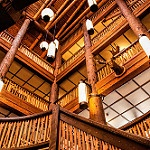

In [ ]:
display(Image('/content/drive/MyDrive/Colab Notebooks/17926.jpg'))

###Error Analysis

The model with the best cross-validation score was the fully connected neural network, with cross-validation accuracy of 0.9405. The hyperparameters for this model are 'batch_size': 64, 'epochs': 10, 'optimizer__learning_rate': 0.001.

In [ ]:
# https://stackoverflow.com/questions/18688948/numpy-how-do-i-find-total-rows-in-a-2d-array-and-total-column-in-a-1d-array
# https://www.geeksforgeeks.org/python/how-to-find-the-index-of-value-in-numpy-array/
# get predicted class probabilities (numpy array)
NN_pred_probs = NN_optimal.predict_proba(Xtest)

# encode ytest
ytest_arr = (pd.get_dummies(ytest, dtype=int)).to_numpy();

misclassified_examples = []

# find instances of misclassification for each class by comparing ytest and NN predictions
for i in range(len(NN_pred)):
  # if the arrays are not exactly equal, there has been a misclassification
  if (np.array_equal(NN_pred[i],ytest_arr[i]) == False):
    # append [index in ytest/NN_pred, true_class, pred_class] to list of misclassified examples.
    # note np.where(NN_pred[i]==1)[0][0] return index position of the value 1 in NN_pred[i]
    misclassified_examples.append([i, np.where(ytest_arr[i]==1)[0][0], np.where(NN_pred[i]==1)[0][0]])

# need to declare a list of lists, as we want to store the lowest probability along with the index of the misclassified example
# first index corresponds to class label
worst_misclf_probs = [[1],[1],[1],[1],[1],[1]]

# find the lowest predicted probability for each class
for ex in misclassified_examples:
  # if the predicted probability for the correct class is lower than the current worst prediction for that class
  if NN_pred_probs[ex[0]][ex[1]] < worst_misclf_probs[ex[1]][0]:
    # update worst_misclf_probs [predicted probability of true class, index, predicted class, true class]
    worst_misclf_probs[ex[1]] = [NN_pred_probs[ex[0]][ex[1]],ex[0],ex[2],ex[1]]

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [ ]:
worst_misclf_probs

[[np.float32(0.0051758788), 1730, np.int64(3), np.int64(0)],
 [np.float32(1.905367e-05), 781, np.int64(2), np.int64(1)],
 [np.float32(2.0937064e-06), 2768, np.int64(1), np.int64(2)],
 [np.float32(1.5431635e-07), 2304, np.int64(2), np.int64(3)],
 [np.float32(0.0001866636), 1752, np.int64(5), np.int64(4)],
 [np.float32(2.8737577e-06), 122, np.int64(2), np.int64(5)]]

In [ ]:
# convert ytest class labels to separate classes
ytest_encoded = pd.get_dummies(ytest, dtype=int)

# get filenames
image_file_names = data['file']

# image_no stores the image numbers of the images which were misclassified the 'worst'
image_col = [0,0,0,0,0,0]
# get image number from worst_misclf_probs
for i in range(len(worst_misclf_probs)):
  # gets the row number in the data dataframe
  rowNum = ytest_encoded.iloc[worst_misclf_probs[i][1]].name
  print(f'Row num (in ytest): {rowNum}')
  image_col[i] = image_file_names.iloc[rowNum]
image_col

Row num (in ytest): 27
Row num (in ytest): 3770
Row num (in ytest): 5196
Row num (in ytest): 8346
Row num (in ytest): 11082
Row num (in ytest): 12339


['369.jpg', '10514.jpg', '10899.jpg', '6844.jpg', '2013.jpg', '17926.jpg']

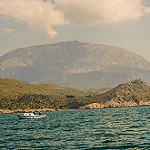

True class: Mountain    Predicted Class: Sea        True label probability: 0.005175878759473562


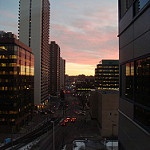

True class: Street      Predicted Class: Building   True label probability: 1.905367025756277e-05


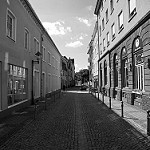

True class: Buildings   Predicted Class: Street     True label probability: 2.0937063709425274e-06


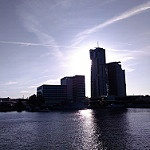

True class: Sea         Predicted Class: Building   True label probability: 1.543163534734049e-07


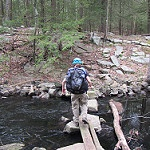

True class: Forest      Predicted Class: Glacier    True label probability: 0.00018666360119823366


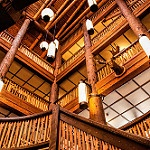

True class: Glacier     Predicted Class: Building   True label probability: 2.8737576940329745e-06


In [ ]:
# https://stackoverflow.com/questions/49478791/how-can-i-open-images-in-a-google-colaboratory-notebook-cell-from-uploaded-png-f
from IPython.display import Image, display

display(Image('/content/drive/MyDrive/Colab Notebooks/369.jpg'))
print(f'True class: Mountain    Predicted Class: Sea        True label probability: {worst_misclf_probs[0][0]}')
display(Image('/content/drive/MyDrive/Colab Notebooks/10514.jpg'))
print(f'True class: Street      Predicted Class: Building   True label probability: {worst_misclf_probs[1][0]}')
display(Image('/content/drive/MyDrive/Colab Notebooks/10899.jpg'))
print(f'True class: Buildings   Predicted Class: Street     True label probability: {worst_misclf_probs[2][0]}')
display(Image('/content/drive/MyDrive/Colab Notebooks/6844.jpg'))
print(f'True class: Sea         Predicted Class: Building   True label probability: {worst_misclf_probs[3][0]}')
display(Image('/content/drive/MyDrive/Colab Notebooks/2013.jpg'))
print(f'True class: Forest      Predicted Class: Glacier    True label probability: {worst_misclf_probs[4][0]}')
display(Image('/content/drive/MyDrive/Colab Notebooks/17926.jpg'))
print(f'True class: Glacier     Predicted Class: Building   True label probability: {worst_misclf_probs[5][0]}')

###Convert to PDF

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
!jupyter nbconvert --to pdf "/content/drive/MyDrive/Colab Notebooks/Lab10-MatthewChristensen-1631625.ipynb"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/Lab10-MatthewChristensen-1631625.ipynb to pdf
/usr/local/share/jupyter/nbconvert/templates/latex/display_priority.j2:32: UserWarning: Your element with mimetype(s) dict_keys(['application/vnd.colab-display-data+json']) is not able to be represented.
  ((*- endblock -*))
[NbConvertApp] Support files will be in Lab10-MatthewChristensen-1631625_files/
[NbConvertApp] Making directory ./Lab10-MatthewChristensen-1631625_files
[NbConvertApp] Writing 319727 bytes to notebook.tex
[NbConvertApp] Building PDF
[NbConvertApp] Running xelatex 3 times: ['xelatex', 'notebook.tex', '-quiet']
[NbConvertApp] Running bibtex 1 time: ['bibtex', 'notebook']
[NbConvertApp] WARNING | bibtex had problems, most likely because there were no citations
[NbConvertApp] PDF successfully created
[NbConvertApp] Writing 4